## Techinique 2 -> random sample imputation
- similar to mean median mode imputation
- consists of taking random observations from the dataset and using these observations to replace nan values
- assumes the data is missing completely at random. 

In [3]:
import pandas as pd 
import numpy as np

In [44]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Age','Fare','Survived'])

In [45]:
print(df.isnull().mean()) # gives percentage of null values 
print("------------------------")
print(df.isnull().sum()) # gives no of null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64
------------------------
Survived      0
Age         177
Fare          0
dtype: int64


In [46]:
df.Age.median()

28.0

In [56]:
def impute_nan(df,variable):
    df[variable+"_median"] = df[variable].fillna(df[variable].median())
    df[variable+'_randomsample'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull()
           ,variable+'randomsample'] = random_sample

In [57]:
impute_nan(df,'Age')

In [58]:
import matplotlib.pyplot as plt 
%matplotlib inline

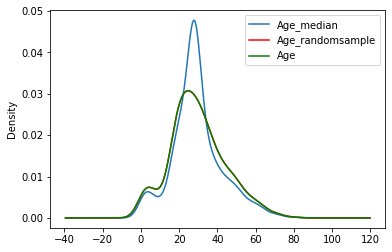

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age_median'].plot(kind='kde',ax=ax)
df['Age_randomsample'].plot(kind='kde',ax=ax,color='red')
df['Age'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
#### notice the read line, and see that it is more clustered around 
# the mean than blue line 

### notice that Age and Age random sample have the almost same distribution.

The advantage of this is that now, the varience does not get distorted. This is doing better than median because median distorts the statistical information like SD and varience. 


#### Advantages 
- easy to implement
- varience does not get distorted 

#### Disadvantages
- in every situation, randomness won't work 

## technique 3 -> capturing NaN values with a new feature 
- this works well when the data is missing not at random

In [3]:
df = pd.read_csv('titanicfinal.csv',usecols=['Age','Fare','Survived'])

In [4]:
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)

In [5]:
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [6]:
df['Age'].fillna(df['Age'].median(),inplace=True)

why are we doing this if we're also filling the null values in this with median/mode/mean/random sample?
- this is because this new Age_NaN feature gives the model additional information on the missing data. when 1 is being assigned to a record, you provide importance to the missingness of the data 

#### advantages of this method
- easy to implement 
- captures the importance of missing values 

#### disadvantage of this method
- suppose there are ten feature with missing values, there will be 10 additional features created. [Curse of dimensionality]

## technique 4 -> End of Distribution imputation 
- used in cases of MNAR [missing not completely at random]
- whatever value is present at the end of the distribution -> that is, after the 3rd standard deviation, is the value we fill in place of null values 

In [33]:
df = pd.read_csv('titanicfinal.csv',usecols = ['Age','Fare','Survived'])

<AxesSubplot: >

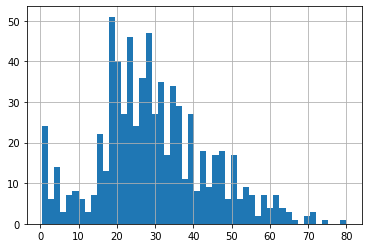

In [34]:
df.Age.hist(bins=50)

/Users/anushkasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age'>

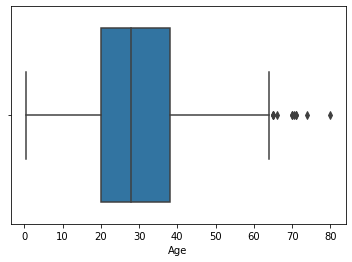

In [35]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [38]:
def impute_nan_end(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [39]:
extreme = df.Age.mean() + 3*df.Age.std()

In [40]:
impute_nan_end(df,'Age',df.Age.median(),extreme)

In [42]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [43]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot: >

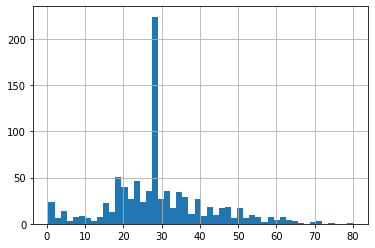

In [44]:
df['Age'].hist(bins=50)

<AxesSubplot: >

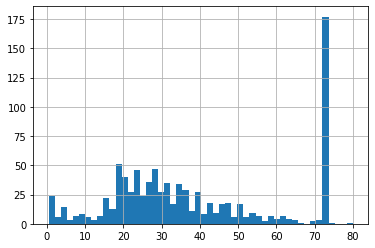

In [46]:
df['Age_end_distribution'].hist(bins=50)

/Users/anushkasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age_end_distribution'>

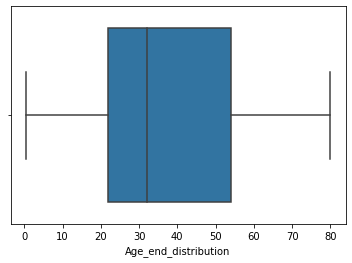

In [47]:
sns.boxplot('Age_end_distribution',data=df)
# this is 

#### outlier has been captured by using end of distribution. check this boxplot, there are no outliers left in this.
the data has become right skewed.

#### advantages of this:
- quick to implement
- captures the importance of missing values

#### disadvantages of this:
- performing this action may distort this variable 
- mask predictive power if missingness is not important
- hide true outliers if the missing data is large 
- may create an unintended outlier if N/As are small